# Midterm T2 2016

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 125 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.

The total score is 850 but you will be graded out of 0.9*850=765.


In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

## Easy Zone (100 Each)

### 1 Taylor Series

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = sin(2x)$$

$
 f(x) = 2x -\frac{8x^3}{3!} + \frac{32x^5}{5!}
$

2) Use the Taylor series you found in 1) to find $$sin(0.2)$$ **along with bound on error**.

In [3]:
def threeTermTayOfSin2x(x):
    return 2*x - 8*(x**3)/(math.factorial(3)) + 32*(x**5)/(math.factorial(5))

print("sin(0.2) on three term tay=",threeTermTayOfSin2x(0.2) )
print("bound on error:",64*math.sin(0.2)*0.1**6/math.factorial(6))

sin(0.2) on three term tay= 0.3894186666666667
bound on error: 1.7659496070672113e-08


## 2) Bisection

We know that 

$$\sin\left(\frac{\pi}{4}\right) = \cos\left(\frac{\pi}{4}\right)$$

This means that we can find the value of $\pi$ by finding the solution of

$$\sin(x) = \cos(x)$$

Then multiply the solution by 4. Then we get the value of $\pi$.

1) Since we multiply solution by 4 at the end. This means that if we want the value of $\pi$ that is accurate at least $10^{-6}$ we need to make sure that our method of finding the solution to $\sin(x) = \cos(x)$ is accurate at least $\displaystyle \frac{10^{-6}}{4}$.

If our initial range is from $x=[0,2]$ and the method we use is bisection, how many iterations do we need to make sure that the solution is at most $\displaystyle\frac{10^{-6}}{4}$ from the real answer.

In [4]:
iteration = math.log2(8*10**6) -1
print("iteration >",iteration)

iteration > 21.931568569324174


2) Find the value of $\pi$ that is accurate at least $10^{-6}$ using the method above.

In [6]:
def f(x):
    return math.sin(x) - math.cos(x)
def bisection(f, l, r,n):
    left = l
    right = r
    mid = (l+r)/2.0
    assert(f(left)*f(right) < 0)
    for i in range(n):
        mid = (left+right)/2.0
        if (f(mid)* f(left) < 0):
            right = mid
        else:
            left = mid
    return mid

print (math.pi)
bisection(f, 0, 2, 22)*4


3.141592653589793


3.141592025756836

### 3 Newton's Method

1) (40) In the homework we found that we can find $\sqrt{x}$ using 

$$x_{n+1}  = \frac{\displaystyle x_{n} + \frac{a}{x_n}}{2}$$

Derive an analogous relation for finding $\sqrt[5]{x}$

$$
    x_{n+1} = x_n -\frac{f(x_n)}{f'(x_n)}
$$


$$
    = x_n -\frac{x_n^5-a}{5x_n^4}
$$

$$
    = \frac{5x_n^5 - x_n^5 + a}{5x_n^4}
$$

$$
    = \frac{4x_n^5 + a}{5x_n^4}
$$
$$
    = \frac{4x_n + \frac{a}{x_n^4}}{5}
$$

2) (40) Find $\sqrt[5]{31}$ to a decent accuracy using what you found above

In [30]:
def next5Rt(x,a):
    return (4*x + a/x**4)/5
def find5Rt(f, x, a, itera):
    if (itera == 0):
        return x
    else:
        return find5Rt(f, next5Rt(x,a), a, itera-1)
print("ANS:",find5Rt(next5Rt,1.5, 31,5))

ANS: 1.9873408102930585


3) (20) Newtons's Method vs Bisection method.

3.1) Which one converge faster?

3.2) Why should we bother using slower one?

ANS:

3.1) newton method is faster it coverges quadratically but bisection mehod coverges linearly

3.2) Newton's method is instability. If you hit a place where the function is close to flat, it may send your next iteration out beyond Pluto. And in fact, there is no guarantee of convergence. You can find it getting caught in a loop. On the other hand, Bisection Method, Guaranteed convergence, provided you can straddle the root at the start. Easily understood, easily programmed, easily performed, slow as blazes. Never sends your iteration off into the wild blue yonder. But still slow as blazes. This is your fallback method when all else fails.

### 4 Legendre

1)If we use Legendre method to find polynomail which passes through all thsese points. What would be the degree of the polynomial? (20)

(-2, 2)

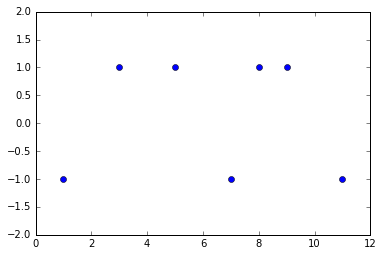

In [15]:
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
plt.plot(xs,ys,'o')
plt.ylim(-2,2)

ANS: degree 6

2) Use Legendre method and plot polynomial which passes through all the points given. (80)

(-7, 7)

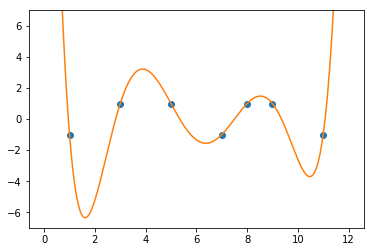

In [41]:
def legendre_generator(xs, ys):
    nterm = len(xs)
    def legendre(x):
        ans = 0
        for i in range(nterm):
            y = ys[i]
            temp=1
            for j in range(nterm):
                if (j!=i):
                    temp *= (x-xs[j])/(xs[i]-xs[j])
            ans+=(y*temp)
        return ans
    return legendre
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
leg = legendre_generator(xs, ys)

plt.plot(xs,ys,'o')
linex =np.linspace(0,12,1000)
liney =[leg(x) for x in linex]
plt.plot(linex,liney)
plt.ylim(-7,7)

### 5 Integration

1) We want to calculate

$$\int_3^7 \sqrt{x} \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

In [80]:
def fpp(x):
    return (-1/4)*(x**(-3/2))
def findMaxM(a,b):
    lst=[]
    for i in range(a,b+1):
        lst.append(abs(fpp(i)))
    return max(lst)
def trapError(a,b,approx):
    return math.sqrt(((b-a)**3) *findMaxM(a,b) /(12*approx))

print(findMaxM(3,7))
print(fpp(3))
print("n >=",trapError(3,7,10**-5))


0.048112522432468816
-0.048112522432468816
n >= 160.1874276089836


2) Use trapezoid rule to calculate
$$\int_3^7 \sqrt{x} \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.


In [72]:
def f(x):
    return x**0.5
def TrapezoidRule(f, a, b, n):
    h=(b-a)/n
    summ=0
    for i in range(1,n):
        summ+=f(a+i*h)
    return (h/2)*(f(a)+f(b)) + h*summ
print(TrapezoidRule(f, 3, 7, 161))


8.882732708470549


### 6 Derivative

1) Find the lowest point in the of function `math.lgamma` in the range of [1,2]. (Give me both x and y) 

x: 1.4616317749023438 y: -0.12148629053578297


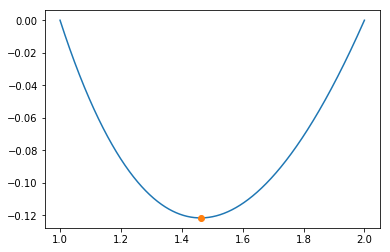

In [8]:
xs = np.linspace(1,2,1000)
ys = [math.lgamma(x) for x in xs]
plt.plot(xs,ys)

def f(x):
    return math.lgamma(x)
def fp(x):
    return (f(x+0.001)-f(x-0.001))/(2*0.001)
def bisection(f, l, r,n):
    left = l
    right = r
    mid = (l+r)/2.0
    assert(f(left)*f(right) < 0)
    for i in range(n):
        mid = (left+right)/2.0
        if (f(mid)* f(left) < 0):
            right = mid
        else:
            left = mid
    return mid
ansx= bisection(fp,1.4,1.6,17)
ansy= f(bisection(fp,1.4,1.6,17))
print("x:",ansx,"y:",ansy)
plt.plot(ansx,ansy,"o")

2) Show that 
$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x) + O(h^2)$$

In [81]:
math.log2(0.2/10**-6)-1

16.609640474436812

## Creative Zone (125 Each)

The questions may look ridiculous. ** Do not panic **. It is much easier than it looks.

### 7 Confidence Interval

##### Intro


In the homework you have calculated full width half max which is a measure of how spread out a distribution is there is another measure which has a better statistical intepretation and is widely used called 95% confidence interval.

All the statistical interpretations aside(which you will learn in AJ Ko's class), the 95% interval is defined to be an interval symmetric around the most probable(highest value) $\bar{x}$, 
$$[\bar{x} - \alpha, \bar{x} + \alpha]$$ such that the **area under the distribution in this interval is 95% of the total area**. Note that the range is symmetric around the most probable(highest value) $\bar{x}$.

The concept is illustrated in the figure below that the 95% confidence interval of the distribution shown below is approximately [-1.2,1.6] since the highest point is at 0.2 and the area of interval [0.2-1.4, 0.2+1.4] = [-1.2, 1.6] is about 95% of the total area.

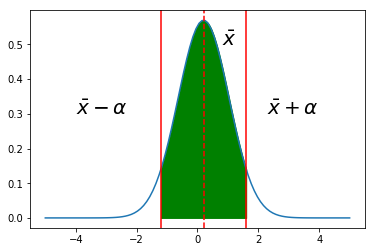

In [88]:
def gaussian(x):
    sigma = 0.7
    mu = 0.2
    return 1/math.sqrt(2*math.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma))

xs = np.linspace(-5,5,100)
ys = gaussian(xs)

xs2 = np.linspace(-1.2,1.6,100)
ys2 = gaussian(xs2)


plt.plot(xs, ys)
plt.fill_between(xs2, 0, ys2,color='green')
plt.axvline(1.6,color='r')
plt.axvline(-1.2,color='r')
plt.axvline(0.2,color='r',ls='dashed')
plt.text(-4,0.3, r'$\bar{x}-\alpha$',size=20)
plt.text(2.3, 0.3, r'$\bar{x}+\alpha$',size=20)
plt.text(0.8, 0.5,r'$\bar{x}$', size=20)


##### Your task

For this problem your task is to find 95% confidence interval for the following distribution.
$$f(x) = \frac{1}{\pi\gamma} \frac{1}{(x-\mu)^2+\gamma^2}$$
with $\mu = 1.$ and $\gamma = 2.$. Your answer should be a range. (Do it for a reasonable accuracy. If you have done the homework, you know what I mean)

You may assume that the total area from $x=-\infty, \infty$ of this distribution is 1. (It actually is 1.)

0.9835392570818964
xbar = 0.9999999850988388
Alpha:  25.414014265624694 CI: [-24.414014280525855, 26.414014250723532]


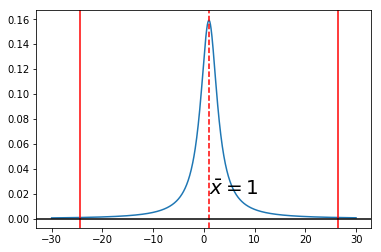

In [131]:
def cauchy(x):
    mu = 1.
    gamma = 2.
    return 1./(math.pi*gamma)*(gamma**2/((x-mu)**2+gamma**2))
def fp2(x):
    return (cauchy(x+0.0001)-cauchy(x-0.0001))/2*0.0001
def bisection2(f, l, r,n):
    left = l
    right = r
    mid = (l+r)/2.0
    assert(f(left)*f(right) < 0)
    for i in range(n):
        mid = (left+right)/2.0
        if (f(mid)* f(left) < 0):
            right = mid
        else:
            left = mid
    return mid
def TrapezoidRule(f, a, b, n):
    h=(b-a)/n
    summ=0
    for i in range(1,n):
        summ+=f(a+i*h)
    return (h/2)*(f(a)+f(b)) + h*summ

def findAlpha(f,xbar,pivAlp,n,ci):
    ans= TrapezoidRule(f, xbar-pivAlp, xbar+pivAlp, n)
    while(abs(ans-ci)>10**-6):
        if(ans>ci):
            pivAlp/=2
        elif(ans<ci):
            pivAlp= pivAlp+ pivAlp/2
        else:
            return pivAlp
        ans= TrapezoidRule(f, xbar-pivAlp, xbar+pivAlp, n)
    return pivAlp
print(TrapezoidRule(cauchy, -100,100,100))

xs = np.linspace(-30,30, 1000)
ys = cauchy(xs)
plt.plot(xs, ys)
xbar=bisection2( fp2, 0,1.5,25 )
print ("xbar =",xbar)
plt.axvline(xbar, color="r", ls="dashed")
plt.text(1.1,0.02, r'$\bar{x}=1$',size=20)

alpha =findAlpha(cauchy,xbar,100,100,0.95)
print("Alpha: ", alpha, "CI: ["+str(xbar-alpha)+",",str(xbar+alpha)+"]")
plt.axvline(xbar-alpha, color="r")
plt.axvline(xbar+alpha, color="r")
plt.axhline(0, color="black")

### 8 Sum of $i^k$


#### Intro

In discrete math we learn that the sum of integer from $1 \ldots n$ is given by
$$\sum_{i=1}^n i = \frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$
and
$$\sum_{i=1}^n i^2 = \frac{n^3}{3}+\frac{n^2}{2}+\frac{n}{6}$$
and
$$\sum_{i=1}^n i^3 = \left( \frac{n(n-1)}{2} \right)^2 = \frac{n^4}{4} + \ldots$$

As you may notice, one can actually show that $\displaystyle \sum_{i=1}^n i^k$ has is a polynomial of degree $k+1$.

To calculate the sum if we use for loop and calculate the left hand side it will be $O(n)$. But if we use the right hand side we can calculate it in $O(1)$. So, calculating it with a closed form is a much better approach.

But as you recall getting the close formed formula is quite difficult to do by hands. In this problem we will use legendre polynomial to find it.

#### Problem


Use what you learn about Legendre Method and write a function that takes in $n$ and $k$ and calculate $$\sum_{i=1}^n i^k$$ in $O(k)$ (NOT $O(n)$).

##### Warning: don't try to sum up too far as it can cause integer overflow.

In [220]:
def sumiPowK(n, k):
    
    def f(x):
        s = 0
        for i in range(x):
            s+= (i+1)**k
        return s

    def legendre_generator(xs, ys):
        nterm = len(xs)
        def legendre(x):
            ans = 0
            for i in range(nterm):
                y = ys[i]
                temp=1
                for j in range(nterm):
                    if (j!=i):
                        temp *= (x-xs[j])/(xs[i]-xs[j])
                ans+=(y*temp)
            return ans
        return legendre
    xs = range(1,k+3)
    ys = [f(x) for x in xs]
    return legendre_generator(xs, ys)(n)

sumiPowK(14,8)


3103591687.000244